In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [13]:
%matplotlib inline

In [2]:
digits=datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['DESCR', 'data', 'target', 'images', 'target_names'])

In [4]:
x=digits.data

In [5]:
y=digits.target

In [6]:
x.shape

(1797, 64)

In [7]:
y.shape

(1797,)

In [8]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [9]:
x[:10]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [10]:
some_digit=x[666]

In [11]:
y[666]

0

# 观察某一张数据

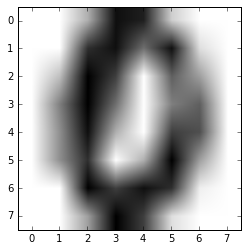

In [14]:
some_digit_image=some_digit.reshape(8,8)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
clf=KNeighborsClassifier()

In [20]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
y_pred=clf.predict(X_test)

In [23]:
acc=sum(y_pred==y_test)/len(y_test)

In [24]:
acc

0.9955555555555555

In [25]:
 from playML.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

0.9955555555555555

## 自带的计算score

In [27]:
clf.score(X_test,y_test)

0.9955555555555555

# 超参数
## 需要提前设定的参数

## 寻找最好的k

In [28]:
best_score=0.0
best_k=-1

for k in range(1,11):
    knn_clf=KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train,y_train)
    score=knn_clf.score(X_test,y_test)
    if score>best_score:
        best_score=score
        best_k=k
        
print('best_k=',best_k)
print('best_score=',best_score)

best_k= 4
best_score= 0.9977777777777778


## 考虑距离？不考虑距离

In [38]:
best_method=' '
best_score=0.0
best_k=-1
for method in ['uniform','distance']:
    for k in range(1,11):
        knn_clf=KNeighborsClassifier(n_neighbors=k,weights=method)
        knn_clf.fit(X_train,y_train)
        score=knn_clf.score(X_test,y_test)
        if score>best_score:
            best_score=score
            best_k=k
            best_method=method
        
print('best_k=',best_k)
print('best_score=',best_score)
print('best_method=',best_method)

best_k= 4
best_score= 0.9977777777777778
best_method= uniform


## 距离选择欧式距离？曼哈顿距离（街区距离）？

### 搜索明可夫斯基距离相应的p

In [40]:
%%time

best_p=-1
best_score=0.0
best_k=-1

for p in range(1,6):
    for k in range(1,11):
        knn_clf=KNeighborsClassifier(n_neighbors=k,weights='distance',p=p)
        knn_clf.fit(X_train,y_train)
        score=knn_clf.score(X_test,y_test)
        if score>best_score:
            best_score=score
            best_k=k
            best_p=p
        
print('best_k=',best_k)
print('best_score=',best_score)
print('best_p=',best_p)

best_k= 4
best_score= 0.9955555555555555
best_p= 1
Wall time: 23.3 s


## 网格搜索

In [42]:
import numpy as np
from sklearn import datasets

In [43]:
digits=datasets.load_digits()
X=digits.data
y=digits.target

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()

## Grid Search

In [46]:
param_grid=[
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    },
]

In [47]:
knn_clf=KNeighborsClassifier()

调用核数n_jobs=-1,verbose=2（ int ）

In [58]:
from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(knn_clf,param_grid,n_jobs=-1,verbose=2)

In [59]:
%%time
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.1s


Wall time: 35.9 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   35.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform']}, {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [50]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

In [51]:
grid_search.best_score_

0.9851521900519673

In [52]:
knn_clf_best=grid_search.best_estimator_

## 更多的距离定义
皮尔森相关系数
Jaccord相关系数等
clf=KNeighborsClassifier(metric='  ')

## 数据归一化 Scale
不同属性的值的量纲尺度不同，将所有数据映射到同一尺度。
最值归一化：所有数据映射到0-1之间，x=(x-x_min)/(x_max-x_min) normalization，适用于分布有明显边界，受outlier影响
均值方差归一化：所有数据归一到均值为0方差为1的分布中，x=(x-x_mean)/s standardlization

### 最值归一化 normalization

In [60]:
import numpy as np

In [61]:
x=np.random.randint(0,100,size=100)

In [62]:
x

array([15, 49, 40, 80, 45, 14, 15, 75, 25, 25, 81, 45, 87, 32, 30, 33, 66,
       72, 52, 73, 38, 51, 85, 14, 39, 68, 75,  0, 92,  4, 62, 39, 22, 29,
       96, 11, 99, 43, 28, 33, 66, 55, 40, 18, 92, 49, 22, 11, 21, 78, 12,
       42, 64, 25, 34,  5, 78, 94, 23,  5, 12, 96, 93, 92, 16, 86, 86, 72,
       30, 64, 20, 54, 22,  0, 39, 77, 93, 66, 75, 99, 54, 80, 13, 69, 48,
       71, 90, 47, 27, 82, 94,  5, 94, 37, 30, 79, 35,  5, 43, 76])

In [63]:
x_min=x.min()
x_max=x.max()

x_normal=(x-x_min)/(x_max-x_min)

In [64]:
x_normal

array([0.15151515, 0.49494949, 0.4040404 , 0.80808081, 0.45454545,
       0.14141414, 0.15151515, 0.75757576, 0.25252525, 0.25252525,
       0.81818182, 0.45454545, 0.87878788, 0.32323232, 0.3030303 ,
       0.33333333, 0.66666667, 0.72727273, 0.52525253, 0.73737374,
       0.38383838, 0.51515152, 0.85858586, 0.14141414, 0.39393939,
       0.68686869, 0.75757576, 0.        , 0.92929293, 0.04040404,
       0.62626263, 0.39393939, 0.22222222, 0.29292929, 0.96969697,
       0.11111111, 1.        , 0.43434343, 0.28282828, 0.33333333,
       0.66666667, 0.55555556, 0.4040404 , 0.18181818, 0.92929293,
       0.49494949, 0.22222222, 0.11111111, 0.21212121, 0.78787879,
       0.12121212, 0.42424242, 0.64646465, 0.25252525, 0.34343434,
       0.05050505, 0.78787879, 0.94949495, 0.23232323, 0.05050505,
       0.12121212, 0.96969697, 0.93939394, 0.92929293, 0.16161616,
       0.86868687, 0.86868687, 0.72727273, 0.3030303 , 0.64646465,
       0.2020202 , 0.54545455, 0.22222222, 0.        , 0.39393

In [65]:
X=np.random.randint(0,100,(50,2))

In [67]:
X=np.array(X,dtype=float)

In [68]:
X[:10,:]

array([[96.,  7.],
       [35., 89.],
       [75., 96.],
       [88., 39.],
       [ 5., 55.],
       [19., 36.],
       [17., 50.],
       [61.,  1.],
       [ 9., 29.],
       [ 0., 26.]])

将第一列的特征值归一化

In [71]:
X[:,0]=(X[:,0]-np.min(X[:,0]))/(np.max(X[:,0])-np.min(X[:,0]))

In [69]:
X[:,1]=(X[:,1]-np.min(X[:,1]))/(np.max(X[:,1])-np.min(X[:,1]))

In [72]:
X[:10,:]

array([[1.        , 0.06122449],
       [0.36458333, 0.89795918],
       [0.78125   , 0.96938776],
       [0.91666667, 0.3877551 ],
       [0.05208333, 0.55102041],
       [0.19791667, 0.35714286],
       [0.17708333, 0.5       ],
       [0.63541667, 0.        ],
       [0.09375   , 0.28571429],
       [0.        , 0.25510204]])

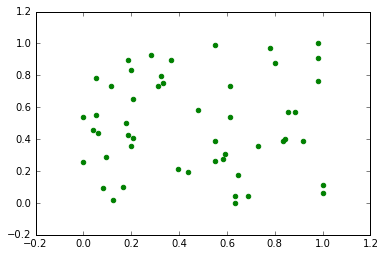

In [73]:
plt.scatter(X[:,0],X[:,1],color='g')
plt.show()

In [74]:
X[:,0].mean()

0.46666666666666673

In [75]:
X[:,0].std()

0.31767247065351933

### 均值方差归一化 standardlization

In [76]:
X2=np.random.randint(0,100,(50,2))

In [78]:
X2=np.array(X2,dtype=float)

In [83]:
X2[:,0]=(X2[:,0]-np.mean(X2[:,0]))/np.std(X2[:,0])

In [84]:
X2[:,1]=(X2[:,1]-np.mean(X2[:,1]))/np.std(X2[:,1])

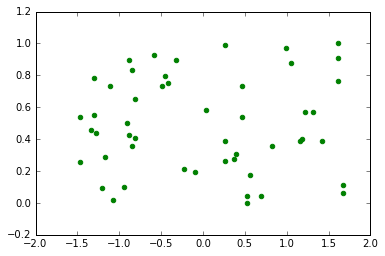

In [86]:
plt.scatter(X2[:,0],X[:,1],color='g')
plt.show()

In [87]:
np.mean(X2[:,0])

8.881784197001253e-18

In [88]:
np.std(X2[:,0])

1.0

In [89]:
np.mean(X2[:,1])

-2.2204460492503132e-17

In [90]:
np.std(X2[:,1])

1.0

## scikit-learn中的Scaler

### 对测试数据集如何归一化
使用mean_train和std_train

In [91]:
import numpy as np
from sklearn import datasets

In [92]:
iris=datasets.load_iris()

In [93]:
X=iris.data
y=iris.target

In [94]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [114]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=666)

In [123]:
X_train[:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5.7, 2.8, 4.1, 1.3]])

### StandardScaler

In [97]:
from sklearn.preprocessing import StandardScaler

从训练数据中得到Scaler,即方差、均值

In [98]:
standardScaler=StandardScaler()

In [99]:
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
standardScaler.mean_

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [102]:
standardScaler.scale_

array([0.81019502, 0.44076874, 1.76295187, 0.75429833])

应用到训练数据集上，转化为归一化数据

In [103]:
standardScaler.transform(X_train)

array([[-0.90616043,  0.94720873, -1.30982967, -1.28485856],
       [-1.15301457, -0.18717298, -1.30982967, -1.28485856],
       [-0.16559799, -0.64092567,  0.22169257,  0.17345038],
       [ 0.45153738,  0.72033239,  0.95909217,  1.49918578],
       [-0.90616043, -1.3215547 , -0.40226093, -0.0916967 ],
       [ 1.43895396,  0.2665797 ,  0.56203085,  0.30602392],
       [ 0.3281103 , -1.09467835,  1.07253826,  0.30602392],
       [ 2.1795164 , -0.18717298,  1.63976872,  1.2340387 ],
       [-0.78273335,  2.30846679, -1.25310662, -1.4174321 ],
       [ 0.45153738, -2.00218372,  0.44858475,  0.43859746],
       [ 1.80923518, -0.41404933,  1.46959958,  0.83631808],
       [ 0.69839152,  0.2665797 ,  0.90236912,  1.49918578],
       [ 0.20468323,  0.72033239,  0.44858475,  0.571171  ],
       [-0.78273335, -0.86780201,  0.10824648,  0.30602392],
       [-0.53587921,  1.40096142, -1.25310662, -1.28485856],
       [-0.65930628,  1.40096142, -1.25310662, -1.28485856],
       [-1.0295875 ,  0.

此时X_train没有改变

In [104]:
X_train=standardScaler.transform(X_train)

In [105]:
X_train[:4,:]

array([[-0.90616043,  0.94720873, -1.30982967, -1.28485856],
       [-1.15301457, -0.18717298, -1.30982967, -1.28485856],
       [-0.16559799, -0.64092567,  0.22169257,  0.17345038],
       [ 0.45153738,  0.72033239,  0.95909217,  1.49918578]])

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn_clf=KNeighborsClassifier(n_neighbors=3)

In [108]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [109]:
knn_clf.score(standardScaler.transform(X_test),y_test)

1.0

In [132]:
from playML.my_preprocessing import StandardScaler

In [133]:
stds=StandardScaler()

In [134]:
stds.fit(X_train)

In [135]:
stds.mean_

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [136]:
stds.transform(X_train)

array([[-0.90616043, -1.15301457, -0.16559799,  0.45153738, -0.90616043,
         1.43895396,  0.3281103 ,  2.1795164 , -0.78273335,  0.45153738,
         1.80923518,  0.69839152,  0.20468323, -0.78273335, -0.53587921,
        -0.65930628, -1.0295875 , -1.77014994, -0.04217092, -0.78273335,
        -1.52329579,  0.82181859, -0.16559799,  0.94524567,  0.20468323,
        -1.39986872, -1.15301457,  1.06867274,  0.57496445,  0.3281103 ,
         0.45153738, -0.16559799,  0.57496445,  0.69839152, -0.90616043,
         1.19209981, -0.90616043, -1.89357701,  0.08125616,  0.69839152,
        -0.28902506, -0.41245214,  1.31552689,  0.57496445,  0.82181859,
        -0.16559799,  0.94524567,  1.06867274, -1.27644165, -1.0295875 ,
         0.20468323, -1.0295875 ,  0.3281103 ,  0.69839152, -0.90616043,
        -0.16559799, -1.0295875 , -0.90616043, -1.52329579, -0.53587921,
         0.82181859,  0.3281103 , -1.27644165, -0.90616043, -0.04217092,
        -0.28902506,  0.57496445,  1.06867274,  1.6

## 更多有关k近邻算法

天然解决多分类问题
还可以解决回归问题

### 效率低下
时间复杂度高

### 优化
使用树结构

### 高度数据相关

### 预测结果不具有可解释性

### 维数灾难
随着维数增大，“看似相近”的两个点之间的距离越来越大
降维